## **Project 3: EEG Classification model**

### **Dataset**

Mounting the Google Drive to enable direct access to Google Drive files within the Colab environment

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Formating the files

In [22]:
# File Formating
import os

for file in os.listdir('/content/drive/MyDrive/Bonn_eeg_dataset/N'):
  if file.endswith('.TXT'):
    os.rename(os.path.join('/content/drive/MyDrive/Bonn_eeg_dataset/N', file), os.path.join('/content/drive/MyDrive/Bonn_eeg_dataset/N', file.lower()))


Loading the dataset

In [23]:
# Loading Dataset
import os
import glob
import numpy as np
all_data = []
all_names = []
for folder in os.listdir('/content/drive/MyDrive/Bonn_eeg_dataset/'):
    for file in glob.glob(os.path.join("/content/drive/MyDrive/Bonn_eeg_dataset/", folder, '*.txt')):
        data = np.loadtxt(file)
        all_data.append(data)
        all_names.append(folder)
all_data=np.array(all_data)

In [24]:
all_data

array([[  92.,   96.,   96., ...,  100.,   83.,  -75.],
       [ 162.,  164.,  164., ...,  -32.,   19., -342.],
       [-183., -183., -182., ..., -215., -209.,  502.],
       ...,
       [   9.,    8.,   12., ...,   23.,   20.,   -2.],
       [ -64.,  -73.,  -79., ...,  -34.,  -39.,  -53.],
       [ -54.,  -62.,  -65., ...,   -2.,  -12.,  -71.]])

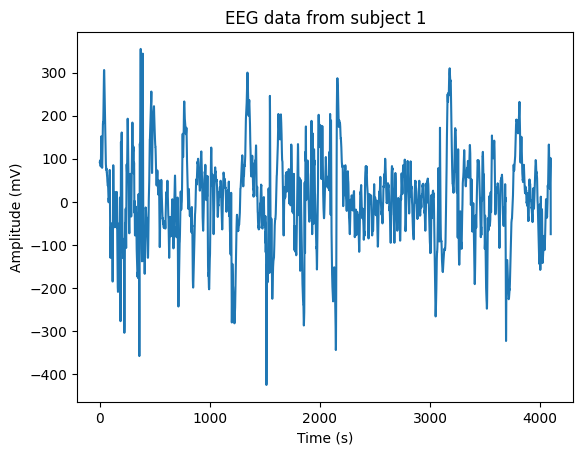

In [25]:
#Line Graph for First array in all_data

import matplotlib.pyplot as plt
# Plot the first array
plt.plot(all_data[0])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('EEG data from subject 1')
plt.show()

In [26]:
# Creating an array for labels
# Changing Z,O as 0 and rest as 1
labels =[0 for i in range(len(all_names))]
for i in range(len(all_names)):
  if all_names[i] == 'Z' or all_names[i] == 'O':
    labels[i] = 0
  else:
    labels[i] = 1

In [27]:
# Finding uniques values and printing it for labels
np.unique(labels)

array([0, 1])

### **Data Preprocessing**

Preprocessing EEG Signals

In [28]:
from scipy.signal import butter, lfilter, freqz
import numpy as np

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

for i in range(len(all_data)):
  all_data[i] = butter_bandpass_filter(all_data[i], 0.5, 45, 250, order=5)

In [29]:
all_data

array([[ 1.27055180e+00,  9.41827055e+00,  3.18686113e+01, ...,
         6.77002426e+01,  7.85113397e+01,  7.75699337e+01],
       [ 2.23727600e+00,  1.65146938e+01,  5.56031825e+01, ...,
         1.51221190e+02,  1.35971162e+02,  1.27528320e+02],
       [-2.52729326e+00, -1.86242863e+01, -6.25672627e+01, ...,
         6.31245206e+01,  6.37327566e+01,  7.87943714e+01],
       ...,
       [ 1.24293111e-01,  9.02138160e-01,  3.03122702e+00, ...,
         1.39271152e+01,  5.22003868e+00, -5.06605158e+00],
       [-8.83862125e-01, -6.63770470e+00, -2.28850875e+01, ...,
        -1.05413412e+01, -7.22587108e+00, -5.02818244e+00],
       [-7.45758668e-01, -5.60617380e+00, -1.93221536e+01, ...,
         4.92304618e+01,  4.80092208e+01,  4.45593661e+01]])

After Preprocessing the data

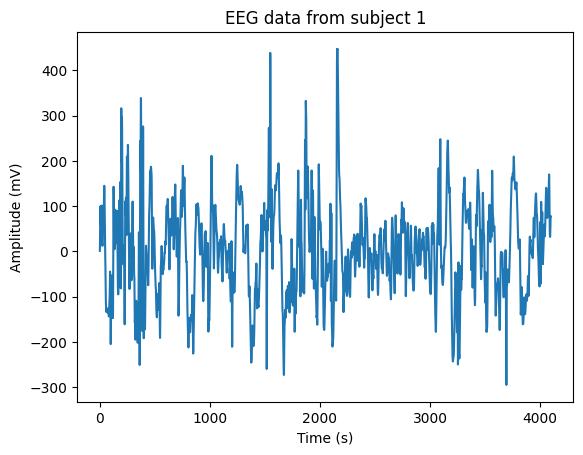

In [30]:
# after preprocessing
import matplotlib.pyplot as plt
# Plotting the first array
plt.plot(all_data[0])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('EEG data from subject 1')
plt.show()

**Data Normarlization**

In [31]:
# Normarlizing using standardscaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_data)
all_data = scaler.transform(all_data)
all_data

array([[ 0.65953613,  0.66555527,  0.67177378, ...,  0.36297366,
         0.4193064 ,  0.45267384],
       [ 1.14186473,  1.14356502,  1.14285442, ...,  0.82890184,
         0.73730167,  0.75523239],
       [-1.23532623, -1.22337032, -1.20257698, ...,  0.33744763,
         0.33751848,  0.46008929],
       ...,
       [ 0.08763222,  0.09191498,  0.09941318, ...,  0.06299603,
         0.01369626, -0.04778716],
       [-0.41536761, -0.41596318, -0.41497041, ..., -0.07350318,
        -0.05518213, -0.04755781],
       [-0.34646352, -0.34648003, -0.34425377, ...,  0.25993853,
         0.25050098,  0.25275486]])

Plotting the first array after normalizing

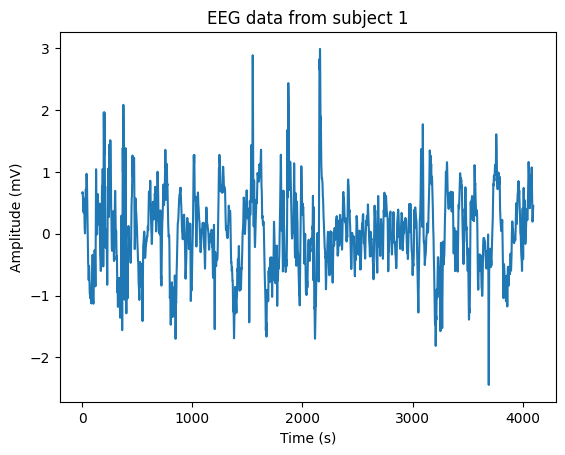

In [32]:
# After normalizing the data
import matplotlib.pyplot as plt
# Plotting
plt.plot(all_data[0])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('EEG data from subject 1')
plt.show()

### **Feature Extraction**

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import welch

# Extracting time-domain features
def extract_time_domain_features(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    skewness = skew(data)
    kurt = kurtosis(data)
    return mean_val, std_val, skewness, kurt

# Extracting frequency-domain features
def extract_frequency_domain_features(data, fs):
    f, Pxx = welch(data, fs=fs, nperseg=len(data))
    peak_freq = f[np.argmax(Pxx)]
    avg_power = np.mean(Pxx)
    return peak_freq, avg_power

# Storing extracted features
time_domain_features_list = []
frequency_domain_features_list = []

# Iterating through each EEG signal
for column in all_data.columns[:-1]:  # Excluding the 'Label' column
    time_domain_features = extract_time_domain_features(all_data[column])
    frequency_domain_features = extract_frequency_domain_features(all_data[column], fs=1000)

    # Appending the features to the respective lists
    time_domain_features_list.append(time_domain_features)
    frequency_domain_features_list.append(frequency_domain_features)

# Converting the lists to NumPy arrays
time_domain_features_array = np.array(time_domain_features_list)
frequency_domain_features_array = np.array(frequency_domain_features_list)

# Displaying the arrays
print("Time-domain features:")
print(time_domain_features_array)

print("\nFrequency-domain features:")
print(frequency_domain_features_array)


Time-domain features:
[[ 41.72548295 166.04778402  -1.46112913   1.9934586 ]
 [ 36.81203727 159.77100438  -1.31734235   1.70011117]
 [ 28.67684062 147.92500969  -1.12847313   1.03198895]
 ...
 [ 27.20134238 191.58227787  -1.69030787   2.07150994]
 [ 26.11097066 158.95055198  -1.57568929   1.67606324]
 [ 22.09052426  92.46908752  -1.51087267   1.26033763]]

Frequency-domain features:
[[ 2.5        35.59954692]
 [ 2.5        35.69743856]
 [ 2.5        32.85180938]
 ...
 [ 2.5        37.71573438]
 [ 2.5        27.57677372]
 [ 2.5         7.32837725]]


### **Data Splitting**

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

# Splitting data into training (75%) and temporary (25%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(all_data, labels, test_size=0.25, random_state=42)

# Splitting the temporary data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

# Converting to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

Training set size: 300
Validation set size: 75
Testing set size: 125


In [34]:
X_train.shape

(300, 4097)

### **Model Selection**

Optuna is used to optimize hyperparameters in the model

In [44]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00


### **Model Training**

In [45]:
import optuna
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

#Model Selection
def objective(trial):
    model = Sequential()

    # Convolutional layer
    model.add(Conv1D(filters=trial.suggest_int('filters', 32, 128),
                     kernel_size=trial.suggest_int('kernel_size', 2, 5),
                     activation='relu', input_shape=(4097, 1)))
    model.add(MaxPooling1D(pool_size=trial.suggest_int('pool_size', 2, 4)))

    # LSTM layers
    model.add(LSTM(units=trial.suggest_int('lstm_units', 64, 256), return_sequences=True))
    model.add(LSTM(units=trial.suggest_int('lstm_units', 64, 256)))

    # Dense layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compiling the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluating the model on the validation set
    accuracy = model.evaluate(X_val, y_val, verbose=0)[1]

    return -accuracy  # Optuna is to minimize the objective, so negate accuracy

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Printing the best parameters found by Optuna
print("Best trial:")
trial = study.best_trial
print("  Value: {:.5f}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Model Training
# Using the best hyperparameters to train the final model
best_filters = trial.params['filters']
best_kernel_size = trial.params['kernel_size']
best_pool_size = trial.params['pool_size']
best_lstm_units = trial.params['lstm_units']

final_model = Sequential()
final_model.add(Conv1D(filters=best_filters, kernel_size=best_kernel_size, activation='relu', input_shape=(4097, 1)))
final_model.add(MaxPooling1D(pool_size=best_pool_size))
final_model.add(LSTM(units=best_lstm_units, return_sequences=True))
final_model.add(LSTM(units=best_lstm_units))
final_model.add(Dense(units=1, activation='sigmoid'))
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the final model
final_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


[I 2023-12-15 23:54:36,977] A new study created in memory with name: no-name-2a055029-23b8-4337-b9fc-21695472e707
[I 2023-12-16 00:00:06,790] Trial 0 finished with value: -0.5733333230018616 and parameters: {'filters': 64, 'kernel_size': 5, 'pool_size': 4, 'lstm_units': 123}. Best is trial 0 with value: -0.5733333230018616.
[I 2023-12-16 00:05:49,338] Trial 1 finished with value: -0.8133333325386047 and parameters: {'filters': 114, 'kernel_size': 4, 'pool_size': 2, 'lstm_units': 71}. Best is trial 1 with value: -0.8133333325386047.
[I 2023-12-16 00:14:35,649] Trial 2 finished with value: -0.6666666865348816 and parameters: {'filters': 115, 'kernel_size': 2, 'pool_size': 4, 'lstm_units': 158}. Best is trial 1 with value: -0.8133333325386047.
[I 2023-12-16 00:21:04,422] Trial 3 finished with value: -0.5733333230018616 and parameters: {'filters': 65, 'kernel_size': 5, 'pool_size': 2, 'lstm_units': 74}. Best is trial 1 with value: -0.8133333325386047.
[I 2023-12-16 00:33:42,245] Trial 4 fi

Best trial:
  Value: -0.96000
  Params: 
    filters: 125
    kernel_size: 3
    pool_size: 3
    lstm_units: 198
Epoch 1/10
8/8 [==============================] - 83s 10s/step - loss: 0.6515 - accuracy: 0.5375 - val_loss: 0.6287 - val_accuracy: 0.5667
Epoch 2/10
8/8 [==============================] - 78s 10s/step - loss: 0.6294 - accuracy: 0.6250 - val_loss: 0.6199 - val_accuracy: 0.5667
Epoch 3/10
8/8 [==============================] - 78s 9s/step - loss: 0.5941 - accuracy: 0.6458 - val_loss: 0.6024 - val_accuracy: 0.6667
Epoch 4/10
8/8 [==============================] - 80s 10s/step - loss: 0.5902 - accuracy: 0.6708 - val_loss: 0.6553 - val_accuracy: 0.5167
Epoch 5/10
8/8 [==============================] - 79s 10s/step - loss: 0.5923 - accuracy: 0.6125 - val_loss: 0.6106 - val_accuracy: 0.5333
Epoch 6/10
8/8 [==============================] - 80s 10s/step - loss: 0.5719 - accuracy: 0.6833 - val_loss: 0.5868 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 79s

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4095, 64)          256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 2047, 64)          0         
 D)                                                              
                                                                 
 lstm_4 (LSTM)               (None, 2047, 128)         98816     
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 230785 (901.50 KB)
Trainable params: 230785 (901.50 KB)
Non-trainable params: 0 (0.00 Byte)
______________

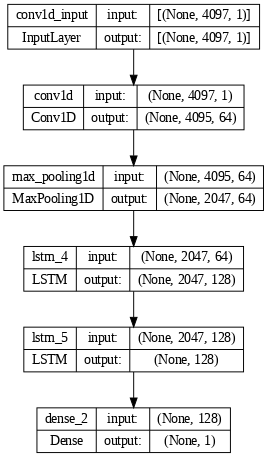

In [50]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, dpi=70)

### **Model Evaluation**

In [46]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 17s 4s/step - loss: 0.6365 - accuracy: 0.7120


[0.6364629864692688, 0.7120000123977661]

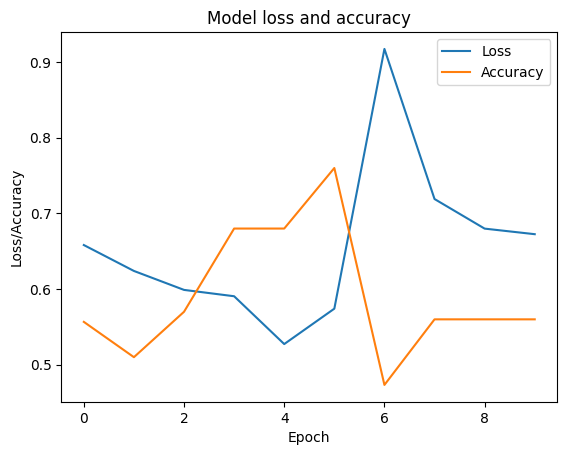

In [47]:
# plotting the loss and accuracy graphs over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss and accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(['Loss', 'Accuracy'])
plt.show()

### **Results and Visualization**

Performing predictions on the test dataset, then displaying the classification report, confusion matrix, and generating a heatmap visualization for the confusion matrix.

4/4 [==============================] - 10s 2s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.71      1.00      0.83        89

    accuracy                           0.71       125
   macro avg       0.36      0.50      0.42       125
weighted avg       0.51      0.71      0.59       125



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


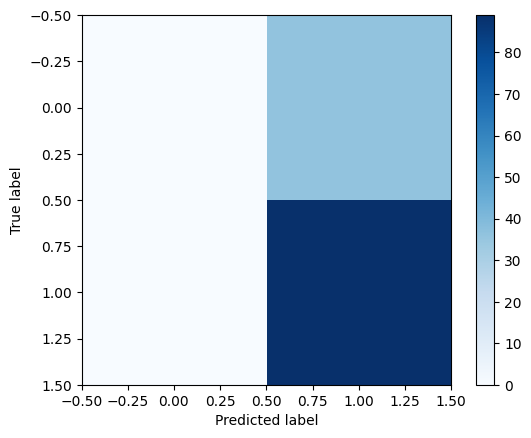

In [48]:
# Classification report, confusion matrix and plotting heatmap for confusion matrix

predictions = model.predict(X_test)
predictions = np.round(predictions)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()